# **Figure 9.** Dust velocities
| Author  | Stanley A. Baronett |
|---------|---------------------|
| Created | 12/01/2022          |
| Updated | 12/03/2022          |

## Time average

Case	 Π	vx_0	<vx>	σ_vx	σ_vz
		(Πc_s)	(Πc_s)	(Πc_s)	(Πc_s)
 (1)	(2)	(7)	(8)	(9)	(10)
AB	0.01	-0.05	-0.11	0.18	0.15
AB	0.02	-0.05	-0.11	0.18	0.14
AB	0.05	-0.05	-0.11	0.17	0.13
AB	0.1	-0.05	-0.11	0.17	0.13
BA	0.01	-0.82	-0.33	0.36	1.47
BA	0.02	-0.82	-0.47	0.37	1.84
BA	0.05	-0.82	-0.57	0.35	1.01
BA	0.1	-0.82	-0.64	0.35	0.63


/home/stanley/bitbucket/ccyang/athena-dust/vis/python/athena_read.py:66: AthenaWarning: Multiple headers found; using most recent data
  warnings.warn('Multiple headers found; using most recent data', AthenaWarning)


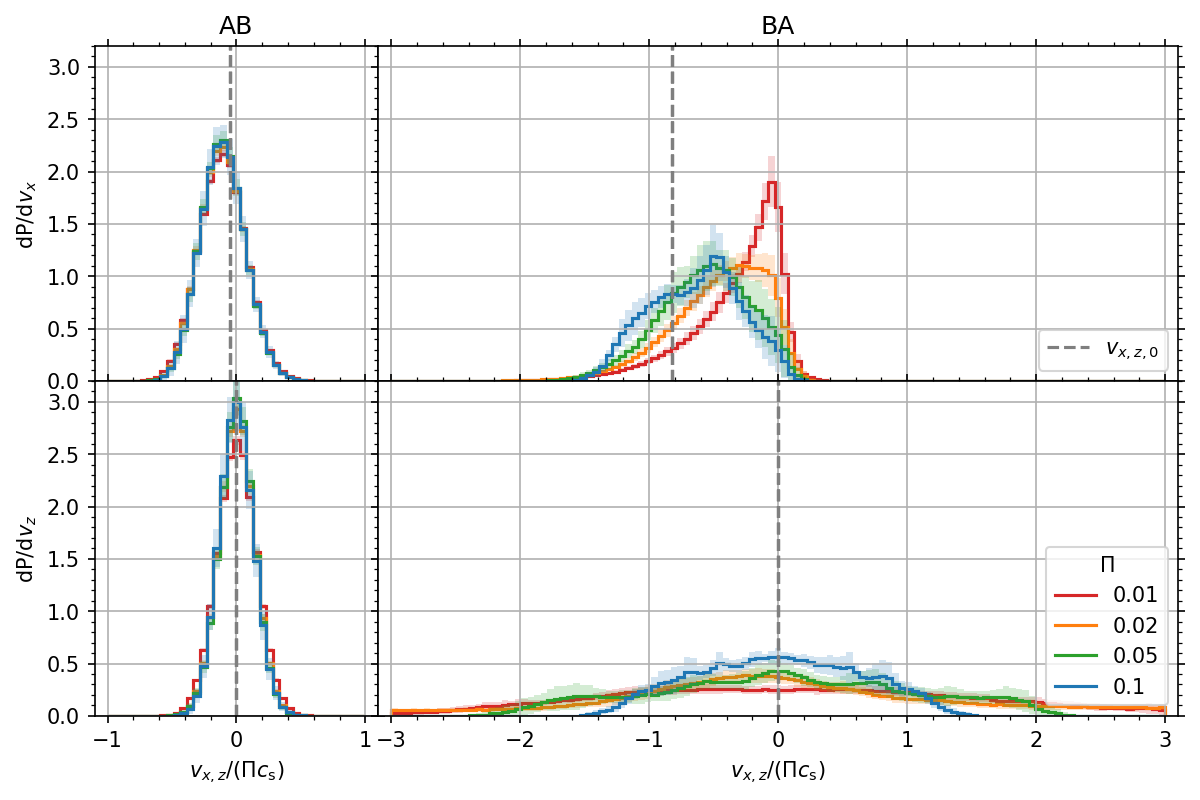

In [5]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, sharex='col', sharey=True, figsize=(9.32, 5.8),
                        width_ratios=[1, 2.82], dpi=150)
workdir = '../unstrat'
cases = [['AB'], ['BA']]
Pis = [['0.01', 'tab:red'], ['0.02', 'tab:orange'],
       ['0.05', 'tab:green'], ['0.10', 'tab:blue']]
res = 2048

print(f'Case\t Π\tvx_0\t<vx>\tσ_vx\tσ_vz')
print(f'\t\t(Πc_s)\t(Πc_s)\t(Πc_s)\t(Πc_s)')
print(f' (1)\t(2)\t(7)\t(8)\t(9)\t(10)')
for i, case in enumerate(cases):
    for Pi in Pis:
        # Collect parameters
        path = f'{workdir}/{case[0]}/{Pi[0]}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        hst = athena_read.hst(f'{path}/output/SI.hst')
        c_s = athinput['hydro']['iso_sound_speed']
        Np = athinput['problem']['npx1']*athinput['problem']['npx2']\
             *athinput['problem']['npx3']
        vx0 = hst['vp1'][0]/Np/float(Pi[0])/c_s
        vz0 = hst['vp2'][0]/Np/float(Pi[0])/c_s
        npz = np.load(f'{path}/npz/dust_vel.npz')
        avg_vxs, avg_vzs = npz['avg_vxs'], npz['avg_vzs']
        std_vxs, std_vzs = npz['std_vxs'], npz['std_vzs']
        bin_avg_vxs, bin_avg_vzs = npz['bin_avg_vxs'], npz['bin_avg_vzs']
        bin_std_vxs, bin_std_vzs = npz['bin_std_vxs'], npz['bin_std_vzs']
        bin_high_vxs = bin_avg_vxs + bin_std_vxs
        bin_low_vxs  = bin_avg_vxs - bin_std_vxs
        bin_high_vzs = bin_avg_vzs + bin_std_vzs
        bin_low_vzs  = bin_avg_vzs - bin_std_vzs
        bin_edges = npz['bin_edges']
        print(f'{case[0]}\t{float(Pi[0])}\t{vx0:.2f}\t{avg_vxs:.2f}\t{std_vxs:.2f}\t{std_vzs:.2f}')

        # Plot histograms, equilibrium velocities
        axs[0][i].stairs(bin_avg_vxs, bin_edges, color=Pi[1], lw=1.5)
        axs[0][i].stairs(bin_high_vxs, bin_edges, baseline=bin_low_vxs,
                         fill=True, color=Pi[1], alpha=0.2)
        axs[0][i].axvline(vx0, c='tab:gray', ls='dashed')
        axs[1][i].stairs(bin_avg_vzs, bin_edges, color=Pi[1], lw=1.5,
                         label=float(Pi[0]))
        axs[1][i].stairs(bin_high_vzs, bin_edges, baseline=bin_low_vzs,
                         fill=True, color=Pi[1], alpha=0.2)
        axs[1][i].axvline(vz0, c='tab:gray', ls='dashed')

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

axs[0][1].plot([], [], color='tab:gray', ls='dashed', label=r'$v_{x,z,0}$')
axs[0][1].legend(loc='lower right')
axs[1][1].legend(loc='lower right', title=r'$\Pi$')
axs[0][0].set(title='AB', ylabel=r'$\mathrm{dP}/\mathrm{d}v_x$')
axs[0][1].set(title='BA', ylim=(0, 3.2))
axs[1][0].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-1.1, 1.1),
              ylabel=r'$\mathrm{dP}/\mathrm{d}v_z$')
axs[1][1].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-3.1, 3.1))
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig(f'figs/dust_velocities.pdf', bbox_inches='tight', pad_inches=0.01)


## Final snapshot

In [14]:
output['VariableNames']

array([b'rho', b'vel1', b'vel2', b'vel3', b'vp1', b'vp2', b'vp3', b'rhop'],
      dtype='|S21')

Case	Π	vx_0/Πc_s	<vx>/Πc_s	σ_vx/Πc_s	vz_0/Πc_s	<vz>/Πc_s      σ_vz/Πc_s
AB	0.01	-0.05		-0.02              0.17		0.00		0.00		0.13
AB	0.02	-0.05		-0.02              0.16		0.00		0.00		0.12
AB	0.05	-0.05		-0.02              0.15		0.00		-0.00		0.11
AB	0.1	-0.05		-0.02              0.16		0.00		0.00		0.12
BA	0.01	-0.82		-0.50              0.55		0.00		-0.03		0.89
BA	0.02	-0.82		-0.77              0.50		0.00		-0.00		1.27
BA	0.05	-0.82		-0.87              0.39		0.00		-0.01		0.73
BA	0.1	-0.82		-0.89              0.32		0.00		-0.01		0.54


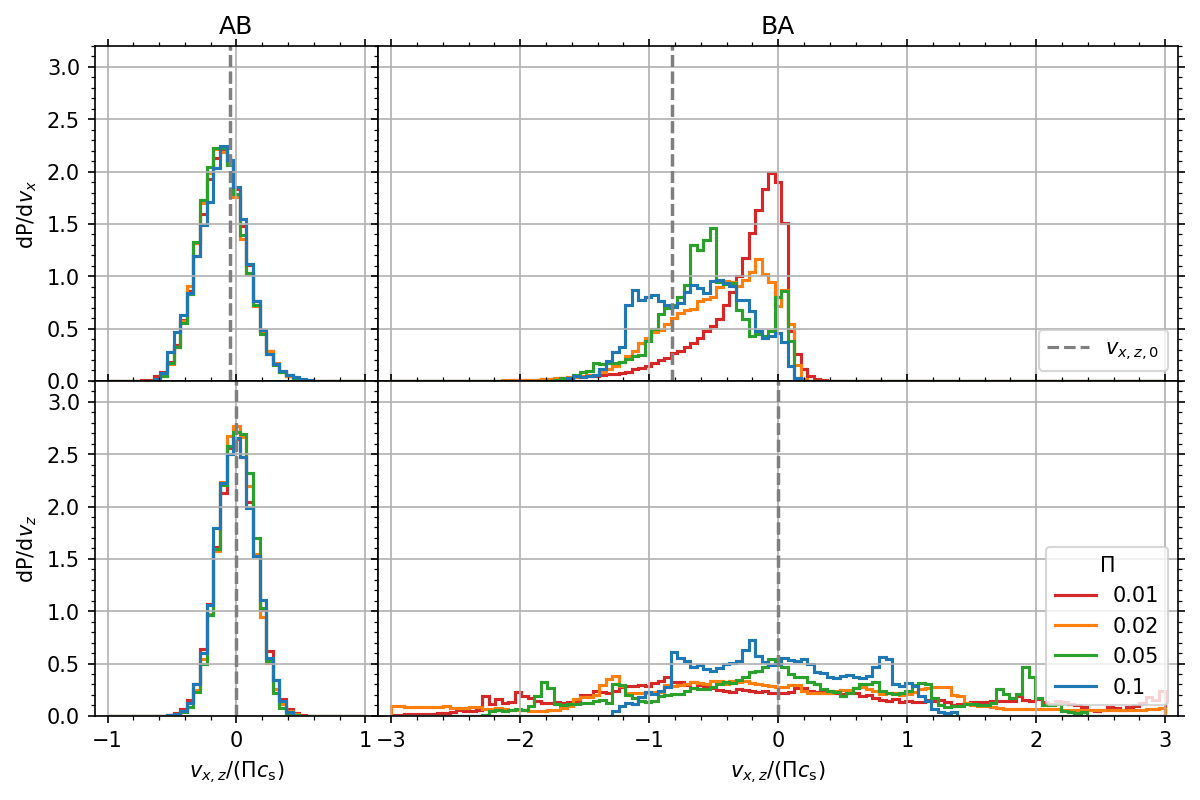

In [3]:
#==============================================================================
import sys
sys.path.insert(0, '/home/stanley/bitbucket/ccyang/athena-dust/vis/python')
import athena_read
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, sharex='col', sharey=True, figsize=(9.32, 5.8),
                        width_ratios=[1, 2.82], dpi=150)
workdir = '../unstrat'
cases = [['AB', 100, 40, 1], ['BA', 200, 120, 3]]
Pis = [['0.01', 'tab:red'], ['0.02', 'tab:orange'],
       ['0.05', 'tab:green'], ['0.10', 'tab:blue']]
res = 2048

print(f'Case\tΠ\tvx_0/Πc_s\t<vx>/Πc_s\tσ_vx/Πc_s\tvz_0/Πc_s\t<vz>/Πc_s\
      σ_vz/Πc_s')
for i, case in enumerate(cases):
    bin_edges = np.linspace(-case[3], case[3], num=case[2])

    for Pi in Pis:
        # Collect parameters
        path = f'{workdir}/{case[0]}/{Pi[0]}/{res}'
        athinput = athena_read.athinput(f'{path}/athinput.si')
        hst = athena_read.hst(f'{path}/output/SI.hst')
        output = athena_read.athdf(f'{path}/athdf/SI.out1.00{case[1]}.athdf')
        c_s = athinput['hydro']['iso_sound_speed']
        Np = athinput['problem']['npx1']*athinput['problem']['npx2']\
             *athinput['problem']['npx3']
        vx0 = hst['vp1'][0]/Np/float(Pi[0])/c_s
        vz0 = hst['vp2'][0]/Np/float(Pi[0])/c_s
        vxs = output['vp1']/float(Pi[0])/c_s
        vzs = output['vp2']/float(Pi[0])/c_s
        rhops = output['rhop']
        avg_vxs, avg_vzs = np.average(vxs), np.average(vzs)
        std_vxs, std_vzs = np.std(vxs), np.std(vzs)
        xhist, bin_edges = np.histogram(vxs, bins=bin_edges, weights=rhops,
                                        density=True)
        zhist, bin_edges = np.histogram(vzs, bins=bin_edges, weights=rhops,
                                        density=True)
        print(f'{case[0]}\t{float(Pi[0])}\t{vx0:.2f}\t\t{avg_vxs:.2f}\
              {std_vxs:.2f}\t\t{vz0:.2f}\t\t{avg_vzs:.2f}\t\t{std_vzs:.2f}')

        # Plot histograms, equilibrium velocities
        axs[0][i].stairs(xhist, bin_edges, color=Pi[1], lw=1.5)
        axs[0][i].axvline(vx0, c='tab:gray', ls='dashed')
        axs[1][i].stairs(zhist, bin_edges, color=Pi[1], lw=1.5,
                         label=float(Pi[0]))
        axs[1][i].axvline(vz0, c='tab:gray', ls='dashed')

# Format and save figure
for ax in axs.flat:
    ax.grid()
    ax.label_outer()
    ax.minorticks_on()
    ax.tick_params(axis='both', which='both', top=True, right=True)

axs[0][1].plot([], [], color='tab:gray', ls='dashed', label=r'$v_{x,z,0}$')
axs[0][1].legend(loc='lower right')
axs[1][1].legend(loc='lower right', title=r'$\Pi$')
axs[0][0].set(title='AB', ylabel=r'$\mathrm{dP}/\mathrm{d}v_x$')
axs[0][1].set(title='BA', ylim=(0, 3.2))
axs[1][0].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-1.1, 1.1),
              ylabel=r'$\mathrm{dP}/\mathrm{d}v_z$')
axs[1][1].set(xlabel=r'$v_{x,z}/(\Pi c_\mathrm{s})$', xlim=(-3.1, 3.1))
plt.subplots_adjust(hspace=0, wspace=0)
# plt.savefig(f'figs/dust_velocities.pdf', bbox_inches='tight', pad_inches=0.01)
